# Importing main libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pyprind
import os
import sys

In [9]:
basepath = 'aclImdb'
labels = {'pos': 1, 'neg': 0}
pbar = pyprind.ProgBar(50000, stream=sys.stdout)

data = []


In [11]:
for s in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(basepath, s, l)
        
        for file in sorted(os.listdir(path)):
            with open(os.path.join(path, file), 'r', encoding='utf-8') as infile:
                txt = infile.read()
            data.append([txt, labels[l]])
            
            pbar.update()


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:01:02


In [12]:
df = pd.DataFrame(data, columns=['review', 'sentiment'])

In [13]:
df

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
...,...,...
49995,"Towards the end of the movie, I felt it was to...",0
49996,This is the kind of movie that my enemies cont...,0
49997,I saw 'Descent' last night at the Stockholm Fi...,0
49998,Some films that you pick up for a pound turn o...,0


<Axes: xlabel='sentiment', ylabel='count'>

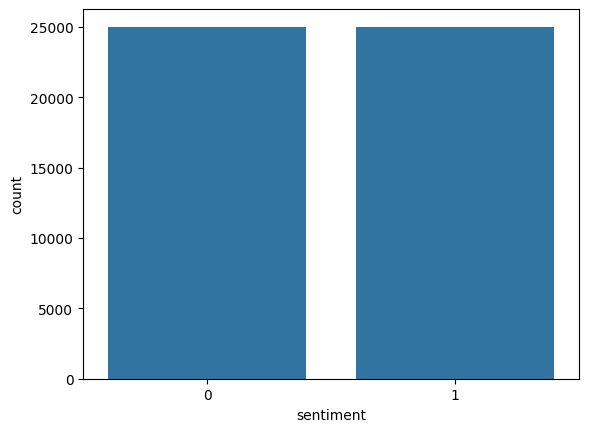

In [15]:
sns.countplot(df, x=df.sentiment)

In [16]:
np.random.seed(0)
df = df.reindex(np.random.permutation(df.index))
df.to_csv('movie_data.csv', index=False, encoding='utf-8')

In [17]:
df = pd.read_csv('movie_data.csv', encoding='utf-8')
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [18]:
df.shape

(50000, 2)

# Преобразование слов в векторы признаков

## Создание bag of words

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer()

In [60]:
docs = np.array(['The sun is shining', 'The weather is sweeet', 'The sun is shining, the weather is sweeet', 'and one and one is two'])
bag = countv.fit_transform(docs)

In [61]:
sorted(countv.vocabulary_.keys())

['and', 'is', 'one', 'shining', 'sun', 'sweeet', 'the', 'two', 'weather']

In [62]:
bag.toarray()

array([[0, 1, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1],
       [0, 2, 0, 1, 1, 1, 2, 0, 1],
       [2, 1, 2, 0, 0, 0, 0, 1, 0]])

In [63]:
df_temp = pd.DataFrame(data=bag.toarray(), columns=sorted(countv.vocabulary_.keys()))
df_temp

,and,is,one,shining,sun,sweeet,the,two,weather
0,0,1,0,1,1,0,1,0,0
1,0,1,0,0,0,1,1,0,1
2,0,2,0,1,1,1,2,0,1
3,2,1,2,0,0,0,0,1,0


## Параметр ngram_range

In [55]:
countv = CountVectorizer(ngram_range=(2, 2))

In [56]:
docs = np.array(['The sun is shining', 'The weather is sweeet', 'The sun is shining, the weather is sweeet', 'and one and one is two'])
bag = countv.fit_transform(docs)

In [57]:
sorted(countv.vocabulary_.keys())

['and one',
 'is shining',
 'is sweeet',
 'is two',
 'one and',
 'one is',
 'shining the',
 'sun is',
 'the sun',
 'the weather',
 'weather is']

In [58]:
countv.vocabulary_

{'the sun': 8,
 'sun is': 7,
 'is shining': 1,
 'the weather': 9,
 'weather is': 10,
 'is sweeet': 2,
 'shining the': 6,
 'and one': 0,
 'one and': 4,
 'one is': 5,
 'is two': 3}

In [52]:
bag.toarray()

array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 0, 1, 1, 1],
       [2, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0]])

# Оценка релевантности слов с помощью частоты термина и обратной частоты документа TF-IDF

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

In [66]:
np.set_printoptions(precision=2)
tfidf.fit_transform(countv.fit_transform(docs)).toarray()

array([[0.  , 0.38, 0.  , 0.57, 0.57, 0.  , 0.46, 0.  , 0.  ],
       [0.  , 0.38, 0.  , 0.  , 0.  , 0.57, 0.46, 0.  , 0.57],
       [0.  , 0.46, 0.  , 0.35, 0.35, 0.35, 0.56, 0.  , 0.35],
       [0.66, 0.17, 0.66, 0.  , 0.  , 0.  , 0.  , 0.33, 0.  ]])

In [71]:
df.loc[0, 'review'][-50:]

'is seven.<br /><br />Title (Brazil): Not Available'

In [72]:
import re
def preprocessor(text):
    text = re.sub('<|[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)1\(1D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower() + ' '.join(emoticons).replace('-', ''))
    return text

<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipykernel_48417/3164997704.py:4: SyntaxWarning: invalid escape sequence '\)'
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)1\(1D|P)', text)
/tmp/ipykernel_48417/3164997704.py:5: SyntaxWarning: invalid escape sequence '\W'
  text = re.sub('[\W]+', ' ', text.lower() + ' '.join(emoticons).replace('-', ''))
